In [1]:
#importing libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import requests
pd.plotting.register_matplotlib_converters()

READING OF SCRAPPED DATA FROM "https://www.airlinequality.com/airline-reviews/british-airways"


In [2]:
#Loading data from path
path = r"D:\PROJECTS\DATA\Web_Scrapped_Data\British_Airways.csv"

In [3]:
#loading data from path into a dataFrame variable
df = pd.read_csv(path)

In [4]:
#viewing data
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | We are extremely grateful ...
1,1,✅ Trip Verified | I had an appalling experie...
2,2,"Not Verified | Good points, the cabin crew, t..."
3,3,"Not Verified | It was a decent flight, reason..."
4,4,✅ Trip Verified | I really like flying Briti...


# DATA CLEANING AND VISUALIZATION

In [5]:
#Showing column object
df.columns

Index(['Unnamed: 0', 'reviews'], dtype='object')

In [6]:
#dropping the Unused col
df = df.drop(['Unnamed: 0'],axis = 1)

In [7]:
df.head()

,reviews
0,✅ Trip Verified | We are extremely grateful ...
1,✅ Trip Verified | I had an appalling experie...
2,"Not Verified | Good points, the cabin crew, t..."
3,"Not Verified | It was a decent flight, reason..."
4,✅ Trip Verified | I really like flying Briti...


In [8]:
# Removing the substring (✅ Trip Verified | and Not Verified | from the reviews texts)
# Deleting ✅ Trip Verified | 

df['reviews'] = df['reviews'].str.replace('✅ Trip Verified |', '', regex=False) 

# Deleting Not Verifies |
df['reviews'] = df['reviews'].str.replace('Not Verified |', '', regex=False)

In [9]:
df.head()

,reviews
0,We are extremely grateful to the crew of fl...
1,I had an appalling experience with British ...
2,"Good points, the cabin crew, they were helpf..."
3,"It was a decent flight, reasonable comfortab..."
4,I really like flying British Airways partic...


# Sentiment Analysis

In [10]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import  Word

# Polarity and subjectivity:

SUBJECTIVITY: Ranges from (0 to 1) which indicates the objectivity and the subjectivity of a text(emotional judgement or personal opinion) where 0 is objective and 1 indicates a subjective statement 



POLARITY: Ranges from (-1 to 1) which indicates a positive or negative statement of a text where +1 indicates a positive statement and -1 indicates a negative statement 

In [11]:
#function for subjectivity sentiment scores
def subjectivity(review):
    return TextBlob(review).sentiment.subjectivity

#function for the polarity sentiment scores
def polarity(review):
    return TextBlob(review).sentiment.polarity


In [12]:
#creating a new column in df to hold the subjectivity and the polarity sentiment scores
df['polarity'] = df['reviews'].apply(polarity)

df['subjectivity']  = df['reviews'].apply(subjectivity)

In [13]:
#showing the df including the new columns ###
df.head()

,reviews,polarity,subjectivity
0,We are extremely grateful to the crew of fl...,0.058750,0.560000
1,I had an appalling experience with British ...,-0.056573,0.383696
2,"Good points, the cabin crew, they were helpf...",0.048286,0.491524
3,"It was a decent flight, reasonable comfortab...",0.143864,0.650733
4,I really like flying British Airways partic...,0.248872,0.512969


# SCORES VISUALIZATION

# Polarity Score

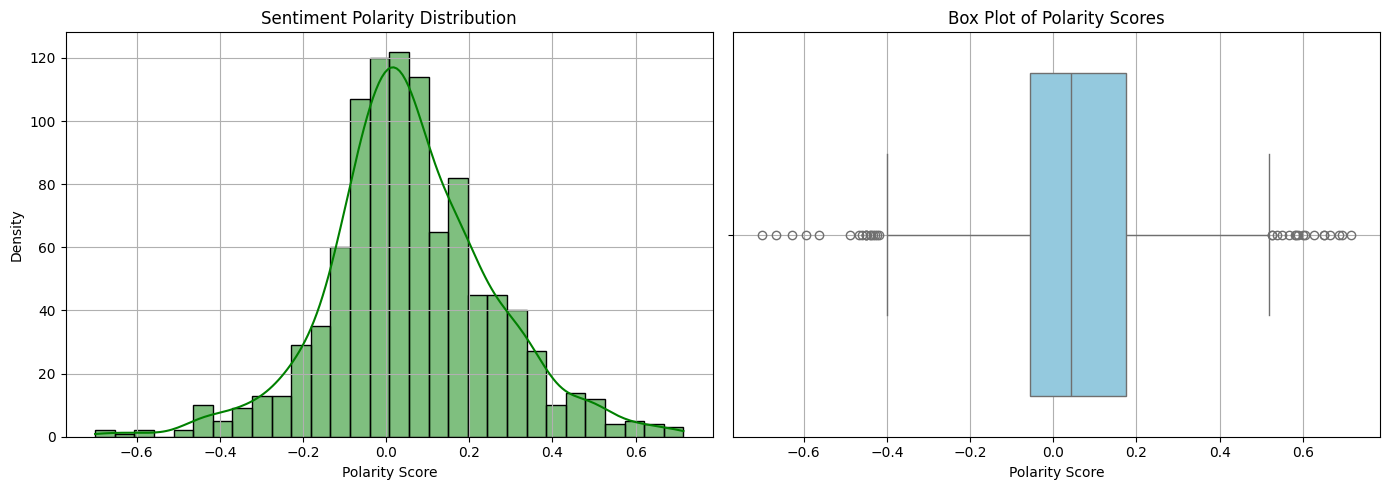

In [14]:
# POLARITY SCORES VISUALIZATION
# Setting  figure size and layout
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Normal Distribution of Polarity 
sns.histplot(df['polarity'], kde=True, bins=30, color='green', ax=axes[0])
axes[0].set_title('Sentiment Polarity Distribution')
axes[0].set_xlabel('Polarity Score')
axes[0].set_ylabel('Density')
axes[0].grid(True)

# Plot 2: Box Plot of Polarity 
sns.boxplot(x=df['polarity'], color='skyblue', ax=axes[1])
axes[1].set_title('Box Plot of Polarity Scores')
axes[1].set_xlabel('Polarity Score')
axes[1].grid(True)

# Display both plots
plt.tight_layout()
plt.show()



# Subjectivity Score

C:\Users\Maran\AppData\Local\Temp\ipykernel_5812\3255039748.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['subjectivity'],shade = True, color='green', ax=axes[0])


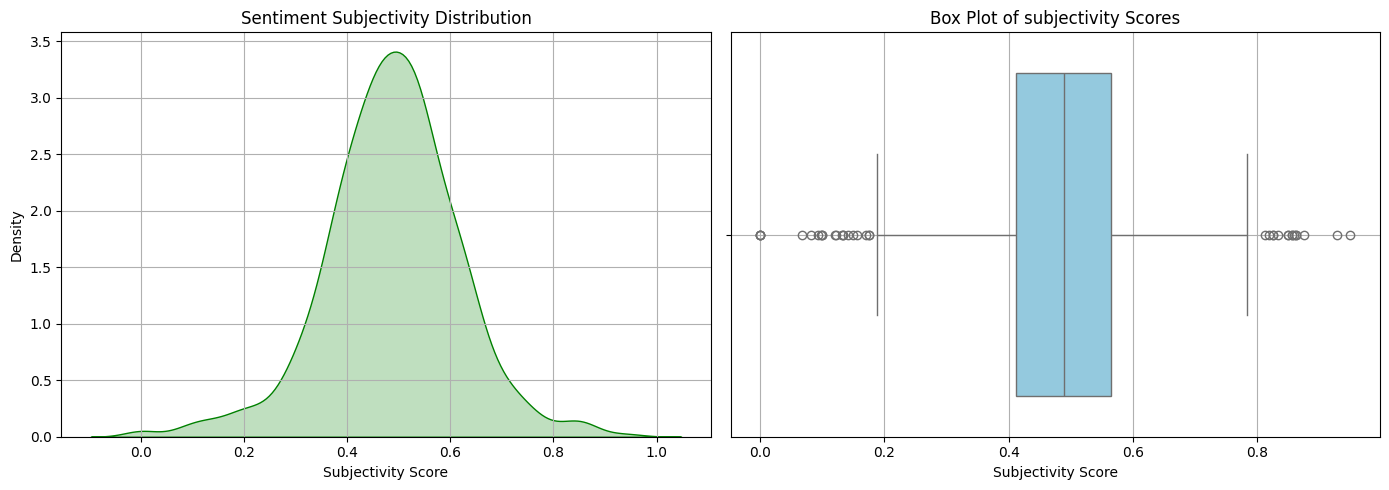

In [15]:
# SUBJECTIVITY SCORES VISUALIZATION
# Setting  figure size and layout
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Normal Distribution of subjectivity 
sns.kdeplot(df['subjectivity'],shade = True, color='green', ax=axes[0])
axes[0].set_title('Sentiment Subjectivity Distribution')
axes[0].set_xlabel('Subjectivity Score')
axes[0].set_ylabel('Density')
axes[0].grid(True)

# Plot 2: Box Plot of subjectivity
sns.boxplot(x=df['subjectivity'], color='skyblue', ax=axes[1])
axes[1].set_title('Box Plot of subjectivity Scores')
axes[1].set_xlabel('Subjectivity Score')
axes[1].grid(True)

# Display both plots
plt.tight_layout()
plt.show()

# INTERPRETATION OF VISUAL OUTPUTS

# Polarity

NORMAL DISTRIBUTION INTERPRETATION:
Most customer review is neutral to mildly positive. This suggests that while there isn't widespread dissatisfaction, there also may not be strong enthusiasm. There are fewer extreme opinions, meaning British Airways likely provides a consistent experience but might not be surprising  regularly.

BOX PLOT INTERPRETATION:
"The presence of outliers on both ends tells us that while most customers are moderate in their views, a subset of users had extremely positive or negative experiences. These extremes should be investigated to understand what caused unusually good or poor reviews.

# Subjectivity [how personal or objective feedbacks were]
NORMAL DISTRIBUTION INTERPRETATION: 
The content is moderately subjective, indicating customers are expressing opinions and emotions, not just facts. This is valuable for understanding perceptions and emotional triggers in customer experience..

BOX PLOT INTERPRETATION:
Some feedback is very objective (e.g., issues with timings, customer experience etc.), while others are highly emotional (e.g., joy or frustration). :


# SUMMARY OF FINDINGS

"Polarity scores indicate that British Airways customers are mostly satisfied, but without strong enthusiasm, while subjectivity scores suggest they are engaged and willing to express opinions. 

# Sentiment polarity probabilities

Getting the positive,negative,neutral and the compound polarities probabilities from the polarity scores 


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

senti = SentimentIntensityAnalyzer()

text = df['reviews']

score = []
for review in text:
# Getting sentiment polarity scores 
    scores = senti.polarity_scores(review)
    score.append(scores)

In [17]:
#Getting the sentiment scores 
score = pd.DataFrame(score) #storing the sentimental polarity probabilities in a dataframe
score.head()


,neg,neu,pos,compound
0,0.000,0.785,0.215,0.8016
1,0.210,0.716,0.074,-0.9936
2,0.078,0.842,0.080,0.5625
3,0.090,0.782,0.128,0.4010
4,0.017,0.820,0.163,0.9688


In [18]:
##Calculating the percentages of sentiment scores

pneg = (score['neg'].sum()/len(df))*100
ppos = (score['pos'].sum()/len(df))*100
pneu = (score['neu'].sum()/len(df))*100
comp =  (score['compound'].sum()/len(df))*100

print(f"Average Negative Sentiment: {pneg:.2f}%")
print(f"Average Positive Sentiment: {ppos:.2f}%")
print(f"Average Neutral Sentiment: {pneu:.2f}%")
print(f"Average Compound Sentiment: {comp:.2f}%")


Average Negative Sentiment: 8.37%
Average Positive Sentiment: 9.77%
Average Neutral Sentiment: 81.86%
Average Compound Sentiment: -2.33%


In [19]:
# Getting the positive or negative statements based on a polarity probability threshold
#creating a new column 
score['sentiment'] = np.where(score['compound'] >= 0 , 'Positive','Negative')

In [20]:
#Getting the total counts of both positive and negative reviews
score['sentiment'].value_counts()

sentiment
Negative    531
Positive    469
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

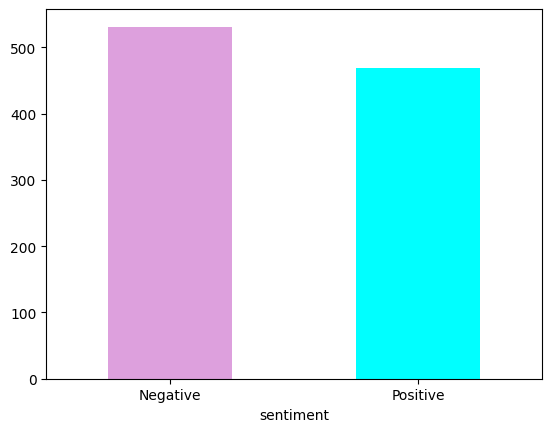

In [21]:
#plotting of the sentiment score
results = score['sentiment'].value_counts()
results.plot(kind = 'bar',rot = 0, color = ['plum','cyan'])


## FINDINGS
To improve customer experience:\
Britsih Airline should tend to focus on those 531 negative comments since they are more in number and could be early warning signals.

For brand perception:\
The high neutral percentage (81.6%) indicates many customers might be indifferent or not strongly moved by BA's current offerings, suggesting opportunities to engage more emotionally.

Based on the compound percentage score of -2.33: \
Indicates on average, the review data contains mostly neutral language, but there's a very slight tendency toward negative wording.

In [22]:
#merging the dataset and the all sentiment scores obtain
df = pd.concat([df.reset_index(drop= True), score ], axis= 1)

In [23]:
#Performing ordinal encoding
sent = {'Positive': 1,'Negative':0}
df['sentiment'] = df['sentiment'].map(sent)

In [24]:
df.head()

,reviews,polarity,subjectivity,neg,neu,pos,compound,sentiment
0,We are extremely grateful to the crew of fl...,0.058750,0.560000,0.000,0.785,0.215,0.8016,1
1,I had an appalling experience with British ...,-0.056573,0.383696,0.210,0.716,0.074,-0.9936,0
2,"Good points, the cabin crew, they were helpf...",0.048286,0.491524,0.078,0.842,0.080,0.5625,1
3,"It was a decent flight, reasonable comfortab...",0.143864,0.650733,0.090,0.782,0.128,0.4010,1
4,I really like flying British Airways partic...,0.248872,0.512969,0.017,0.820,0.163,0.9688,1


In [25]:
# Descriptive statistics 
df.describe()

,polarity,subjectivity,neg,neu,pos,compound,sentiment
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.057962,0.486695,0.083680,0.818598,0.097718,-0.023330,0.469000
std,0.197977,0.129784,0.059164,0.080059,0.089594,0.793975,0.499288
min,-0.700000,0.000000,0.000000,0.451000,0.000000,-0.996100,0.000000
25%,-0.056380,0.412381,0.042750,0.776750,0.036000,-0.829800,0.000000
50%,0.042540,0.488685,0.075000,0.829000,0.069000,-0.206550,0.000000
75%,0.174212,0.564052,0.116250,0.873000,0.134000,0.882000,1.000000
max,0.715000,0.950000,0.349000,1.000000,0.479000,0.999200,1.000000


In [26]:
#columns to keep for predictive analysis 
cols  = ['polarity','subjectivity','neg','neu','pos','compound','sentiment']

In [27]:
#new data
df1 = df[cols]

In [28]:
df1.head()


,polarity,subjectivity,neg,neu,pos,compound,sentiment
0,0.058750,0.560000,0.000,0.785,0.215,0.8016,1
1,-0.056573,0.383696,0.210,0.716,0.074,-0.9936,0
2,0.048286,0.491524,0.078,0.842,0.080,0.5625,1
3,0.143864,0.650733,0.090,0.782,0.128,0.4010,1
4,0.248872,0.512969,0.017,0.820,0.163,0.9688,1


In [29]:
# Saving data
import os

#path = "D:\DATA\Web_Scrapped_Data"
#name = 'BA sentiment Analysis.csv'

#full = os.path.join(path,name)
#df1.to_csv(full,index = True)